In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

# Load the datasets

In [2]:
p = Path('.')
train = Path('data/train.csv')
test = Path('data/test.csv')

In [3]:
train_data= pd.read_csv(train)
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data=pd.read_csv(test)
test_data.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(train_data.columns)
print(test_data.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)


In [6]:
order = list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [7]:
X = train_data.drop(columns=['label'], axis = 1)
y = train_data['label']

# Modeling

### Random Forest before PCA

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
clf = RandomForestClassifier(max_depth=20, random_state=0)

In [10]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=0)

In [11]:
y_pred = clf.predict(X_test)
y_pred

array([3, 6, 9, ..., 2, 7, 2], dtype=int64)

In [12]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.964047619047619


## KNN before PCA

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
y_pred = knn.predict(X_test)
y_pred

array([3, 6, 9, ..., 2, 7, 2], dtype=int64)

In [17]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9680952380952381


# PCA

In [18]:
## Standarize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=200) # reduced to 200 features
X_PCA = sklearn_pca.fit_transform(X_scaled)
X_PCA


array([[ -5.1404777 ,  -5.22644533,   3.88700044, ...,   0.46466025,
         -1.00392998,  -0.06485785],
       [ 19.29233237,   6.03299591,   1.30814799, ...,  -0.40255887,
          0.88818793,   0.03197245],
       [ -7.64450343,  -1.70581318,   2.28932648, ...,  -0.24003644,
          0.02596274,  -0.05767203],
       ...,
       [  0.49539143,   7.07627655, -12.08969929, ...,   0.63019114,
         -0.24624807,   0.08775624],
       [  2.30724015,  -4.34451272,   0.69984777, ...,   0.33789659,
         -0.41672466,  -1.13858522],
       [ -4.80767025,   1.55912046,  -2.4979357 , ...,   0.61198091,
         -0.85792603,  -0.43501727]])

In [21]:
d = sklearn_pca.explained_variance_ratio_
d

array([0.05747953, 0.04111691, 0.03782867, 0.02939862, 0.02556439,
       0.02229844, 0.01952552, 0.01771605, 0.0156266 , 0.01424956,
       0.01361009, 0.01222541, 0.01135736, 0.0111309 , 0.01050311,
       0.01012326, 0.00951303, 0.00934514, 0.00907259, 0.00885327,
       0.00838907, 0.00812027, 0.00775161, 0.00752312, 0.0072769 ,
       0.00698756, 0.00690455, 0.00664924, 0.00630675, 0.00616301,
       0.00610922, 0.00597037, 0.00577284, 0.00573682, 0.00564822,
       0.00546322, 0.0053943 , 0.00524361, 0.00504843, 0.0048853 ,
       0.00482244, 0.00475901, 0.00460008, 0.00457628, 0.00449584,
       0.00446722, 0.00443837, 0.00436837, 0.00432713, 0.00427027,
       0.00419268, 0.0041218 , 0.0040246 , 0.00399433, 0.0039489 ,
       0.00390804, 0.00379898, 0.00372453, 0.00368412, 0.00365721,
       0.00353276, 0.00351086, 0.00345412, 0.00341393, 0.00337783,
       0.00336473, 0.00331706, 0.00329724, 0.00320011, 0.00316771,
       0.0031269 , 0.00311859, 0.00308208, 0.0030327 , 0.00301

In [22]:
len(d)

200

In [23]:
total = 0
for ele in range(0, len(d)):
    total = total + d[ele]

In [24]:
print('The total percentage preserved after reduction:', total*100, '%')

The total percentage preserved after reduction: 87.24480990655366 %


## Random Forest with PCA data

In [25]:
X1 = X_PCA
y1 = train_data['label'].values

In [26]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [27]:
clf2 = RandomForestClassifier(max_depth=20, random_state=0)
clf2.fit(X1_train, y1_train)

RandomForestClassifier(max_depth=20, random_state=0)

In [28]:
y1_pred = clf2.predict(X1_test)
y1_pred

array([3, 6, 9, ..., 2, 7, 2], dtype=int64)

In [29]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

Accuracy: 0.9353571428571429


## KNN with PCA data

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)

In [33]:
knn.fit(X1_train, y1_train)


KNeighborsClassifier()

In [34]:
y1_pred = knn.predict(X1_test)
y1_pred

array([3, 6, 9, ..., 2, 7, 2], dtype=int64)

In [35]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

Accuracy: 0.9497619047619048


# Visualize the first 5 test samples and their predicted digit value in the title

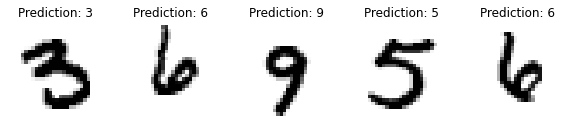

In [37]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test.values, y_pred):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

## Submision

In [39]:
my_submission = pd.DataFrame({'Id': X_test.index, 'classified_digit': y_pred})
my_submission.to_csv('submission.csv', index=False)

In [40]:
my_submission

,Id,classified_digit
0,16275,3
1,19204,6
2,18518,9
3,25780,5
4,16228,6
...,...,...
8395,30285,9
8396,18020,2
8397,26193,2
8398,26564,7


In [41]:
import sys
print(sys.executable)

C:\Users\HP\anaconda3\python.exe
